In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('ilhamfp31/yelp-review-dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import drive
!mkdir -p '/content/drive/MyDrive/yelp'
drive.mount('/content/drive/MyDrive/yelp')

Drive already mounted at /content/drive/MyDrive/yelp; to attempt to forcibly remount, call drive.mount("/content/drive/MyDrive/yelp", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/yelp/MyDrive/yelp/train.csv',header=None, names=["Sentiment", "Review"])
test=pd.read_csv('/content/drive/MyDrive/yelp/MyDrive/yelp/test.csv',header=None, names=["Sentiment", "Review"])


train.head(10)

,Sentiment,Review
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...
5,1,Wing sauce is like water. Pretty much a lot of...
6,1,Owning a driving range inside the city limits ...
7,1,This place is absolute garbage... Half of the...
8,2,Before I finally made it over to this range I ...
9,2,I drove by yesterday to get a sneak peak. It ...


In [ ]:
train['Sentiment'] = train['Sentiment'].map({1: 'negative', 2: 'positive'})
test['Sentiment'] = test['Sentiment'].map({1: 'negative', 2: 'positive'})


In [ ]:
train.head(10)

,Sentiment,Review
0,negative,"Unfortunately, the frustration of being Dr. Go..."
1,positive,Been going to Dr. Goldberg for over 10 years. ...
2,negative,I don't know what Dr. Goldberg was like before...
3,negative,I'm writing this review to give you a heads up...
4,positive,All the food is great here. But the best thing...
5,negative,Wing sauce is like water. Pretty much a lot of...
6,negative,Owning a driving range inside the city limits ...
7,negative,This place is absolute garbage... Half of the...
8,positive,Before I finally made it over to this range I ...
9,positive,I drove by yesterday to get a sneak peak. It ...


In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train['Sentiment'].value_counts()

,count
Sentiment,
negative,280000
positive,280000


In [ ]:
test['Sentiment'].value_counts()

,count
Sentiment,
positive,19000
negative,19000


In [ ]:
row_5 = train.iloc[4]
print(row_5)

Sentiment                                             positive
Review       All the food is great here. But the best thing...
Name: 4, dtype: object


<Axes: >

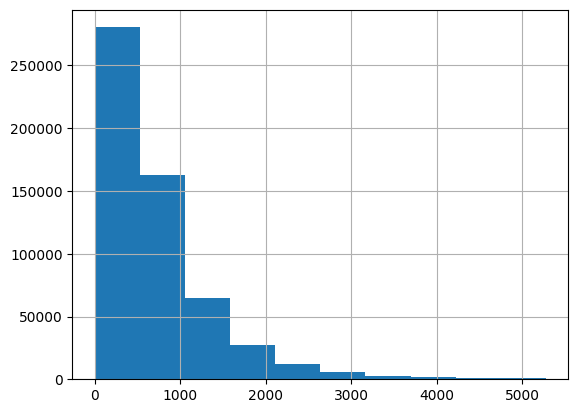

In [ ]:
#The histogram shows that reviews range from 10 to 14000 characters and generally, it is between 10 to 1500 characters.
train['Review'].str.len().hist()

Text(0.5, 1.0, ' negative Reviews')

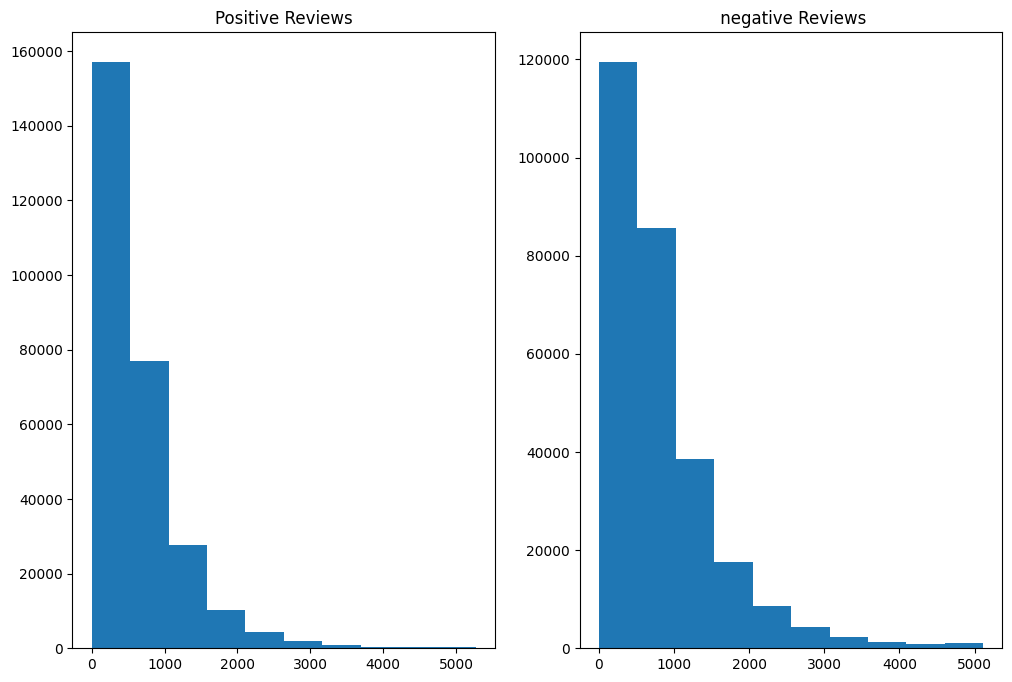

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(train[train['Sentiment']=='positive']['Review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(train[train['Sentiment']=='negative']['Review'].str.len())
ax2.set_title( ' negative Reviews')

In [ ]:
#train['Review_clean'] = train['Review'].str.replace('the', '', regex=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


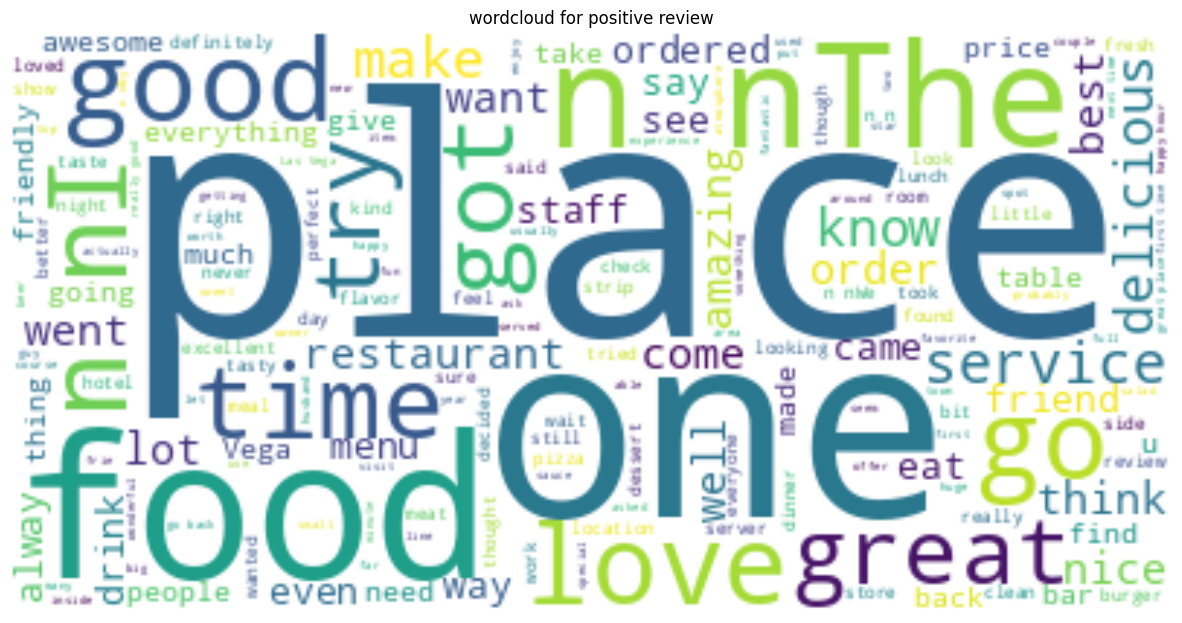

In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(STOPWORDS)


text = " ".join(i for i in train[train['Sentiment']=='positive']['Review'])
wordcloud = WordCloud( background_color="white").generate(text)

wordcloud = WordCloud(stopwords=stop_words, background_color="white").generate(text)

plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for positive review')
plt.show()

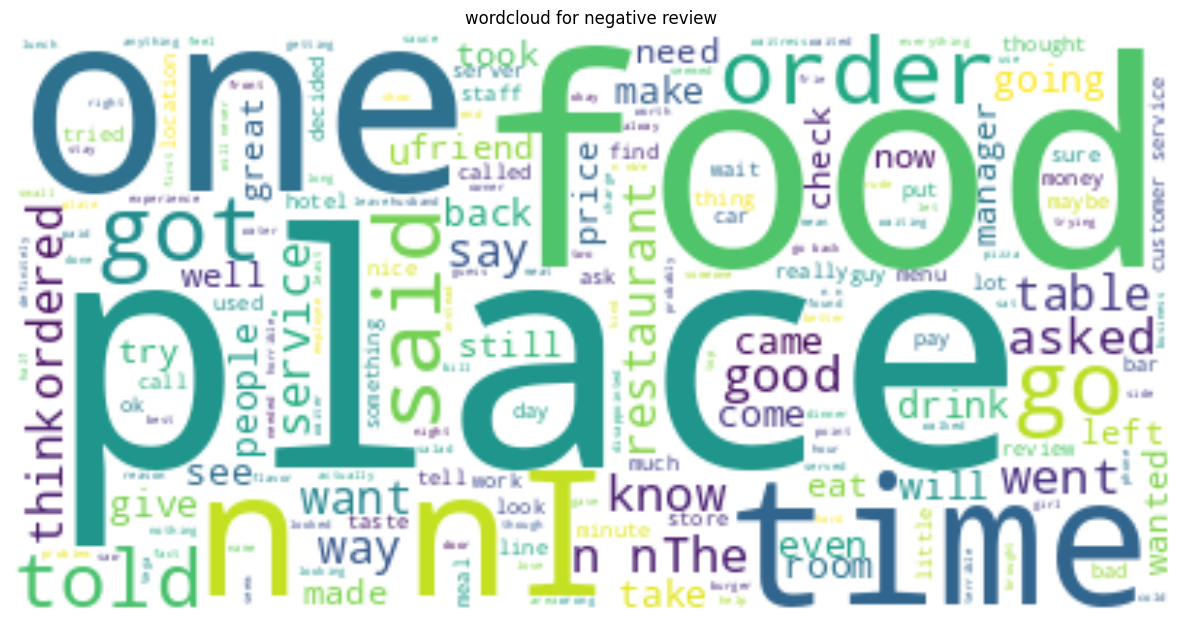

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

text = " ".join(i for i in train[train['Sentiment']=='negative']['Review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud( background_color="white").generate(text)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('wordcloud for negative review')
plt.show()

In [ ]:
def cleaning(text):
    # converting to lowercase, removing URL links, special characters...
    text = text.lower()
    #text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r"\b\d+\b", "", text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    #removing emoji:
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

   # removing short form:

    text=re.sub("isn't",'is not',text)
    text=re.sub("he's",'he is',text)
    text=re.sub("wasn't",'was not',text)
    text=re.sub("there's",'there is',text)
    text=re.sub("couldn't",'could not',text)
    text=re.sub("won't",'will not',text)
    text=re.sub("they're",'they are',text)
    text=re.sub("she's",'she is',text)
    text=re.sub("There's",'there is',text)
    text=re.sub("wouldn't",'would not',text)
    text=re.sub("haven't",'have not',text)
    text=re.sub("That's",'That is',text)
    text=re.sub("you've",'you have',text)
    text=re.sub("He's",'He is',text)
    text=re.sub("what's",'what is',text)
    text=re.sub("weren't",'were not',text)
    text=re.sub("we're",'we are',text)
    text=re.sub("hasn't",'has not',text)
    text=re.sub("you'd",'you would',text)
    text=re.sub("shouldn't",'should not',text)
    text=re.sub("let's",'let us',text)
    text=re.sub("they've",'they have',text)
    text=re.sub("You'll",'You will',text)
    text=re.sub("i'm",'i am',text)
    text=re.sub("we've",'we have',text)
    text=re.sub("it's",'it is',text)
    text=re.sub("don't",'do not',text)
    text=re.sub("that´s",'that is',text)
    text=re.sub("I´m",'I am',text)
    text=re.sub("it’s",'it is',text)


    return text
train['Review'] = train['Review'].apply(cleaning)
test['Review'] = test['Review'].apply(cleaning)

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

train['no_sw'] = train['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
test['no_sw'] = test['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [ ]:
print("Train DataFrame with no stop words:")
train.head(5)

Train DataFrame with no stop words:


,Sentiment,Review,no_sw
0,negative,unfortunately the frustration of being dr gold...,unfortunately frustration dr goldbergs patient...
1,positive,been going to dr goldberg for over years i th...,going dr goldberg years think one 1st patients...
2,negative,i dont know what dr goldberg was like before ...,dont know dr goldberg like moving arizona let ...
3,negative,im writing this review to give you a heads up ...,im writing review give heads see doctor office...
4,positive,all the food is great here but the best thing ...,food great best thing wings wings simply fanta...


In [ ]:
print("Test DataFrame with no stop words:")
test.head(5)

Test DataFrame with no stop words:


,Sentiment,Review,no_sw
0,positive,contrary to other reviews i have zero complain...,contrary reviews zero complaints service price...
1,negative,last summer i had an appointment to get new ti...,last summer appointment get new tires wait sup...
2,positive,friendly staff same starbucks fair you get any...,friendly staff starbucks fair get anywhere els...
3,negative,the food is good unfortunately the service is ...,food good unfortunately service hit miss main ...
4,positive,even when we didnt have a car filenes basement...,even didnt car filenes basement worth bus trip...


In [ ]:
from collections import Counter
cnt = Counter()
for no_sw in train["no_sw"].values:
    for word in no_sw.split():
        cnt[word] += 1
cnt.most_common(10)
temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']
temp

,word,count
0,food,319986
1,place,316457
2,good,290134
3,like,259157
4,get,235875
5,one,231846
6,time,209778
7,would,206956
8,great,205953
9,service,202040


In [ ]:
import plotly.express as px
px.bar(temp, x="count", y="word", title='Commmon Words in Text', orientation='h',
             width=700, height=700)


In [ ]:
# Remove the most frequent words IN train SET:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(Review):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(Review).split() if word not in FREQWORDS])
train["wo_stopfreq"] = train["no_sw"].apply(lambda text: remove_freqwords(text))
train.head()

,Sentiment,Review,no_sw,wo_stopfreq
0,negative,unfortunately the frustration of being dr gold...,unfortunately frustration dr goldbergs patient...,unfortunately frustration dr goldbergs patient...
1,positive,been going to dr goldberg for over years i th...,going dr goldberg years think one 1st patients...,going dr goldberg years think 1st patients sta...
2,negative,i dont know what dr goldberg was like before ...,dont know dr goldberg like moving arizona let ...,dont know dr goldberg moving arizona let tell ...
3,negative,im writing this review to give you a heads up ...,im writing review give heads see doctor office...,im writing review give heads see doctor office...
4,positive,all the food is great here but the best thing ...,food great best thing wings wings simply fanta...,best thing wings wings simply fantastic wet ca...


In [ ]:

# Remove the most frequent words IN Test SET:
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(Review):
    """custom function to remove the frequent words"""
    return " ".join([word for word in str(Review).split() if word not in FREQWORDS])
test["wo_stopfreq"] = test["no_sw"].apply(lambda text: remove_freqwords(text))
test.head()

,Sentiment,Review,no_sw,wo_stopfreq
0,positive,contrary to other reviews i have zero complain...,contrary reviews zero complaints service price...,contrary reviews zero complaints prices gettin...
1,negative,last summer i had an appointment to get new ti...,last summer appointment get new tires wait sup...,last summer appointment new tires wait super l...
2,positive,friendly staff same starbucks fair you get any...,friendly staff starbucks fair get anywhere els...,friendly staff starbucks fair anywhere else so...
3,negative,the food is good unfortunately the service is ...,food good unfortunately service hit miss main ...,unfortunately hit miss main issue seems kitche...
4,positive,even when we didnt have a car filenes basement...,even didnt car filenes basement worth bus trip...,even didnt car filenes basement worth bus trip...


In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

train['wo_stopfreq_lem'] = train['wo_stopfreq'].apply(wordnet_lem.lemmatize)

test['wo_stopfreq_lem'] = test['wo_stopfreq'].apply(wordnet_lem.lemmatize)

train.head()

test.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentiment,Review,no_sw,wo_stopfreq,wo_stopfreq_lem
0,positive,contrary to other reviews i have zero complain...,contrary reviews zero complaints service price...,contrary reviews zero complaints prices gettin...,contrary reviews zero complaints prices gettin...
1,negative,last summer i had an appointment to get new ti...,last summer appointment get new tires wait sup...,last summer appointment new tires wait super l...,last summer appointment new tires wait super l...
2,positive,friendly staff same starbucks fair you get any...,friendly staff starbucks fair get anywhere els...,friendly staff starbucks fair anywhere else so...,friendly staff starbucks fair anywhere else so...
3,negative,the food is good unfortunately the service is ...,food good unfortunately service hit miss main ...,unfortunately hit miss main issue seems kitche...,unfortunately hit miss main issue seems kitche...
4,positive,even when we didnt have a car filenes basement...,even didnt car filenes basement worth bus trip...,even didnt car filenes basement worth bus trip...,even didnt car filenes basement worth bus trip...



## Tokenization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(train['Review'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
tokenizeTrain_review=train['Review'].apply(lambda x: x.split())
tokenizeTest_review=test['Review'].apply(lambda x: x.split())



In [ ]:
tokenizeTrain_review.head(5)

,Review
0,"[unfortunately, the, frustration, of, being, d..."
1,"[been, going, to, dr, goldberg, for, over, yea..."
2,"[i, dont, know, what, dr, goldberg, was, like,..."
3,"[im, writing, this, review, to, give, you, a, ..."
4,"[all, the, food, is, great, here, but, the, be..."


In [ ]:
tokenizeTest_review.head(5)

,Review
0,"[contrary, to, other, reviews, i, have, zero, ..."
1,"[last, summer, i, had, an, appointment, to, ge..."
2,"[friendly, staff, same, starbucks, fair, you, ..."
3,"[the, food, is, good, unfortunately, the, serv..."
4,"[even, when, we, didnt, have, a, car, filenes,..."


In [ ]:
train.head(5)

,Sentiment,Review,no_sw,wo_stopfreq,wo_stopfreq_lem
0,negative,unfortunately the frustration of being dr gold...,unfortunately frustration dr goldbergs patient...,unfortunately frustration dr goldbergs patient...,unfortunately frustration dr goldbergs patient...
1,positive,been going to dr goldberg for over years i th...,going dr goldberg years think one 1st patients...,going dr goldberg years think 1st patients sta...,going dr goldberg years think 1st patients sta...
2,negative,i dont know what dr goldberg was like before ...,dont know dr goldberg like moving arizona let ...,dont know dr goldberg moving arizona let tell ...,dont know dr goldberg moving arizona let tell ...
3,negative,im writing this review to give you a heads up ...,im writing review give heads see doctor office...,im writing review give heads see doctor office...,im writing review give heads see doctor office...
4,positive,all the food is great here but the best thing ...,food great best thing wings wings simply fanta...,best thing wings wings simply fantastic wet ca...,best thing wings wings simply fantastic wet ca...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

X_train = train['Review']
y_train = train['Sentiment']
X_test = test['Review']
y_test = test['Sentiment']

# Vectorize the text data using the training set
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

# Train the model on the training data
CNB = ComplementNB()
CNB.fit(X_train_vect, y_train)

# Predict and calculate accuracy on the test set
predicted = CNB.predict(X_test_vect)
accuracy_score_value = accuracy_score(y_test, predicted)
print('ComplementNB model accuracy is', f'{accuracy_score_value * 100:.2f}%')
print('------------------------------------------------')

# Get unique labels from y_test and predicted for confusion matrix
labels = sorted(set(y_test) | set(predicted))

# Generate confusion matrix with labels
cm = confusion_matrix(y_test, predicted, labels=labels)
print('Confusion Matrix:')
print(pd.DataFrame(cm, columns=['Predicted ' + str(label) for label in labels],
                   index=['Actual ' + str(label) for label in labels]))
print('------------------------------------------------')

# Classification report
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 86.76%
------------------------------------------------
Confusion Matrix:
                 Predicted negative  Predicted positive
Actual negative               16197                2803
Actual positive                2227               16773
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.85      0.87     19000
    positive       0.86      0.88      0.87     19000

    accuracy                           0.87     38000
   macro avg       0.87      0.87      0.87     38000
weighted avg       0.87      0.87      0.87     38000



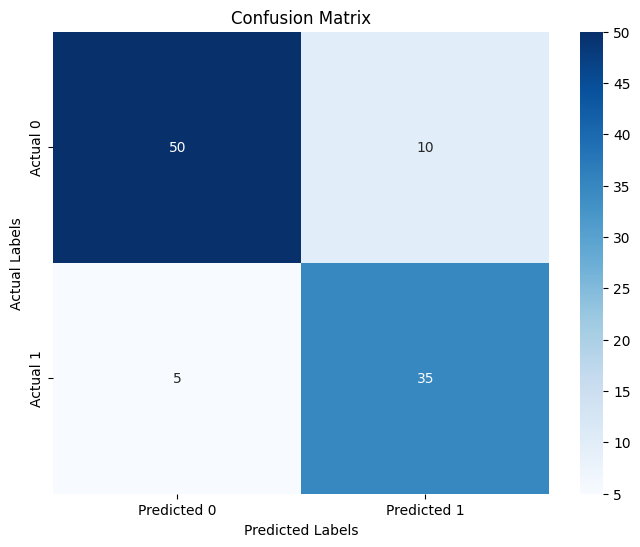

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the confusion matrix with heatmap for better visualization
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted ' + str(label) for label in labels],
                yticklabels=['Actual ' + str(label) for label in labels])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.show()


conf_matrix = [[50, 10], [5, 35]]  # Placeholder values
labels = [0, 1]  # Placeholder labels

# Plot the confusion matrix
plot_confusion_matrix(conf_matrix, labels)


Logistic Regression model accuracy is 93.23%
------------------------------------------------
Confusion Matrix:
                 Predicted negative  Predicted positive
Actual negative               17733                1267
Actual positive                1306               17694
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

    negative       0.93      0.93      0.93     19000
    positive       0.93      0.93      0.93     19000

    accuracy                           0.93     38000
   macro avg       0.93      0.93      0.93     38000
weighted avg       0.93      0.93      0.93     38000



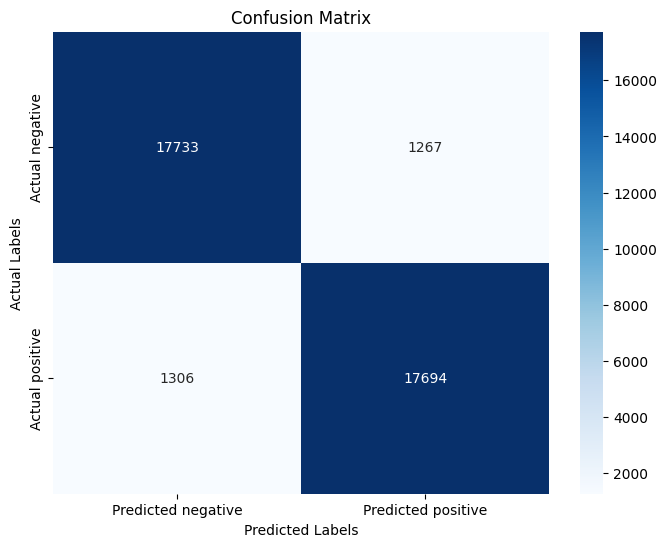

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_train = train['Review']
y_train = train['Sentiment']
X_test = test['Review']
y_test = test['Sentiment']

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vect, y_train)

predicted = model.predict(X_test_vect)
accuracy_score_value = accuracy_score(y_test, predicted)
print('Logistic Regression model accuracy is', f'{accuracy_score_value * 100:.2f}%')
print('------------------------------------------------')

labels = sorted(set(y_test) | set(predicted))
cm = confusion_matrix(y_test, predicted, labels=labels)
print('Confusion Matrix:')
print(pd.DataFrame(cm, columns=['Predicted ' + str(label) for label in labels],
                   index=['Actual ' + str(label) for label in labels]))
print('------------------------------------------------')

print('Classification Report:')
print(classification_report(y_test, predicted))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted ' + str(label) for label in labels],
            yticklabels=['Actual ' + str(label) for label in labels])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()
